In [2]:
!pip install -r requirements.txt

     ---------------------------------------- 6.9/6.9 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.22.0 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df =pd.read_excel('telco.xlsx')
pd.set_option('display.max_columns',None)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,equipten,cardten,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,2,No,No,Yes,No,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00,No,No,No,No,No,No,Yes,No,No,1.308333,#NULL!,#NULL!,2.014903,#NULL!,4.158883,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,6,Yes,No,Yes,Yes,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,1.481605,3.032546,#NULL!,2.72458,3.575151,4.912655,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,2,Yes,No,Yes,No,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00,No,No,No,No,Yes,Yes,No,Yes,No,2.898671,2.890372,#NULL!,3.409496,#NULL!,4.753590,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,1,No,No,No,No,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00,No,No,No,No,No,No,No,No,No,2.246015,#NULL!,#NULL!,#NULL!,#NULL!,3.496508,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00,No,No,No,No,Yes,No,Yes,Yes,No,1.840550,#NULL!,#NULL!,#NULL!,#NULL!,3.401197,Plus service,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   object 
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   object 
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   object 
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   object 
 9   gender    1000 non-null   object 
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   object 
 12  equip     1000 non-null   object 
 13  callcard  1000 non-null   object 
 14  wireless  1000 non-null   object 
 15  longmon   1000 non-null   float64
 16  tollmon   1000 non-null   float64
 17  equipmon  1000 non-null   float64
 18  cardmon   1000 non-null   float64
 19  wiremon   1000 non-null   float64
 20  longten   1000 non-null   float

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'longten', 'tollten', 'equipten', 'cardten', 'wireten', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'ebill', 'loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       'custcat', 'churn'],
      dtype='object')

In [5]:
df.drop(['wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon','equip', 'callcard','pager',
         'longten', 'tollten', 'equipten', 'cardten', 'wireten','callid', 'callwait', 'forward', 'confer',
         'multline','loglong', 'logtoll', 'logequi', 'logcard', 'logwire', 'lninc',
       ],axis =1 ,inplace = True)

droped the above columns

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,voice,internet,ebill,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,2,No,No,No,No,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,6,Yes,Yes,No,No,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,2,Yes,No,No,No,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,1,No,No,No,No,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,Plus service,No


In [7]:
df.isna().sum()

region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
employ      0
retire      0
gender      0
reside      0
tollfree    0
voice       0
internet    0
ebill       0
custcat     0
churn       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    1000 non-null   object
 1   tenure    1000 non-null   int64 
 2   age       1000 non-null   int64 
 3   marital   1000 non-null   object
 4   address   1000 non-null   int64 
 5   income    1000 non-null   int64 
 6   ed        1000 non-null   object
 7   employ    1000 non-null   int64 
 8   retire    1000 non-null   object
 9   gender    1000 non-null   object
 10  reside    1000 non-null   int64 
 11  tollfree  1000 non-null   object
 12  voice     1000 non-null   object
 13  internet  1000 non-null   object
 14  ebill     1000 non-null   object
 15  custcat   1000 non-null   object
 16  churn     1000 non-null   object
dtypes: int64(6), object(11)
memory usage: 132.9+ KB


In [9]:
num_features = []
for i in df.columns:
  if df[i].dtypes !='object':
     num_features.append(i)
num_features

['tenure', 'age', 'address', 'income', 'employ', 'reside']

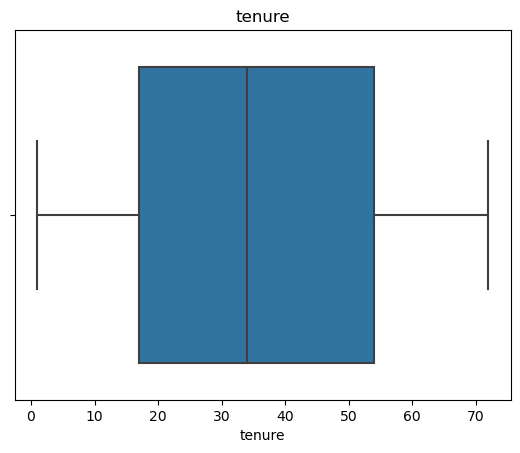

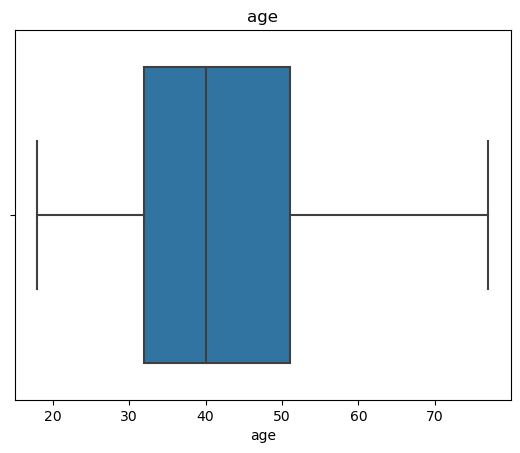

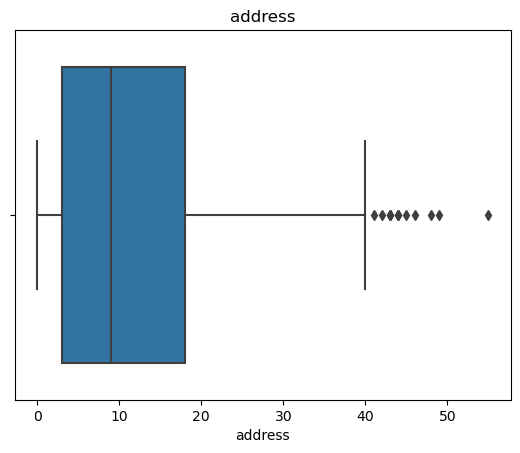

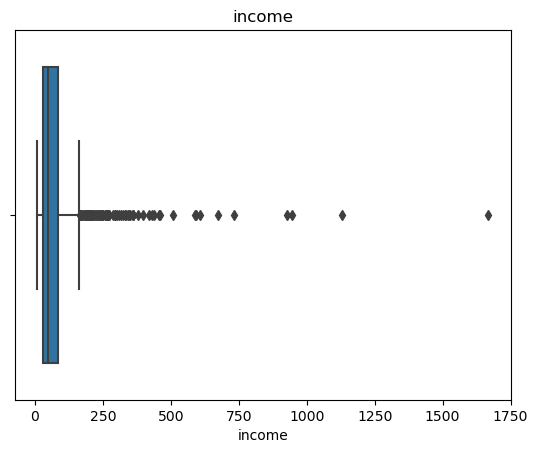

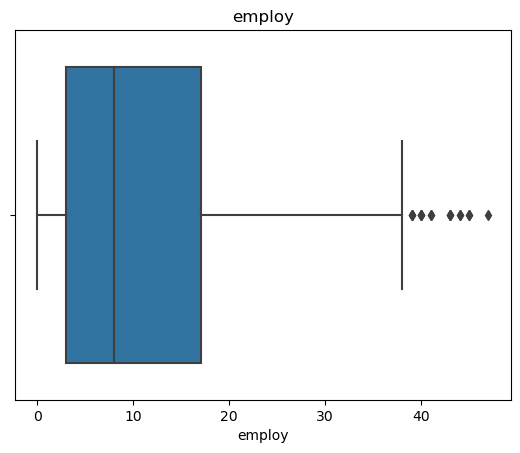

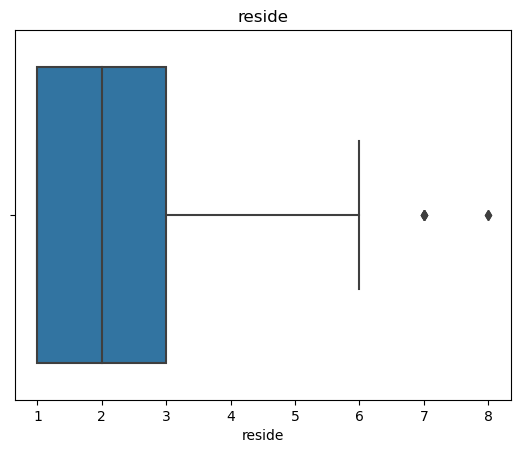

In [10]:
for k in num_features:
  sns.boxplot(x=k,data = df)
  plt.title(k)
  plt.show()

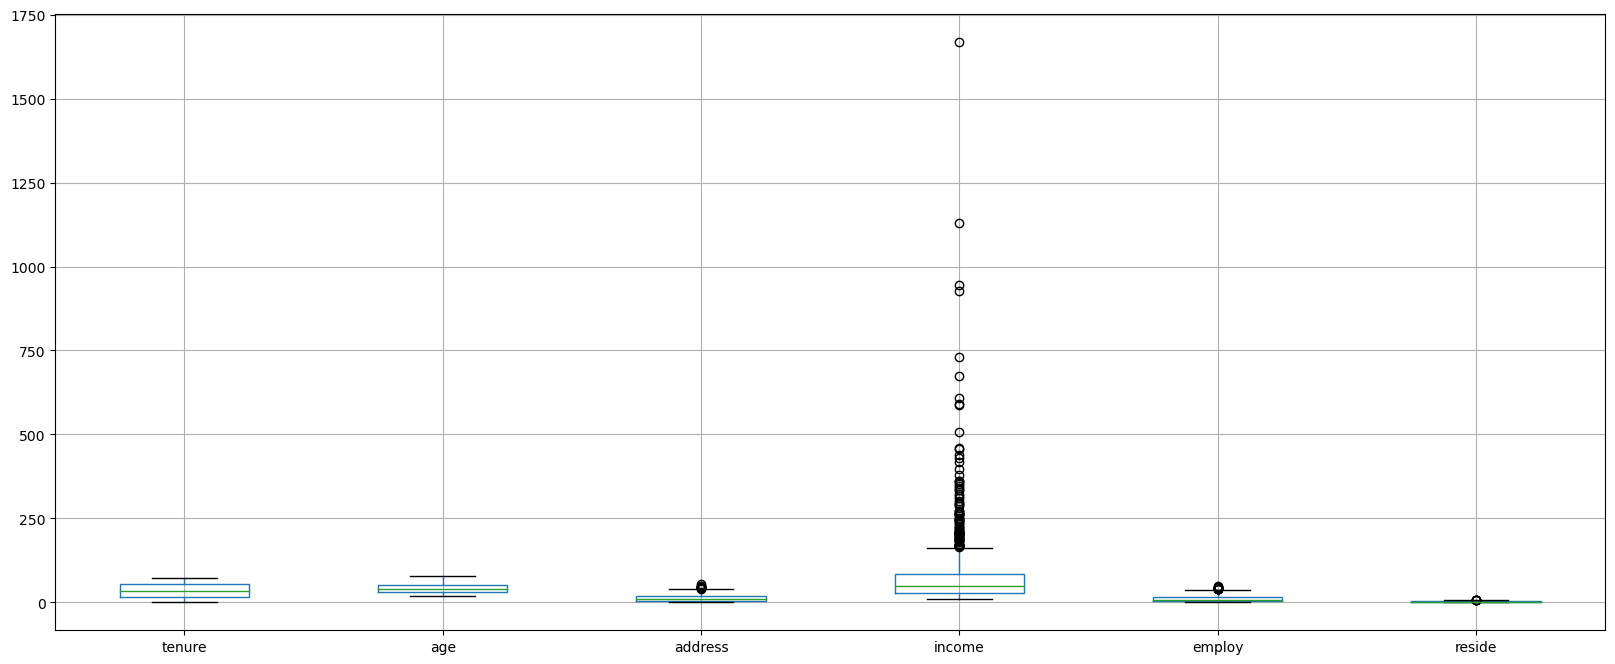

In [11]:
plt.figure(figsize = (20,8))
df.boxplot()
plt.show()

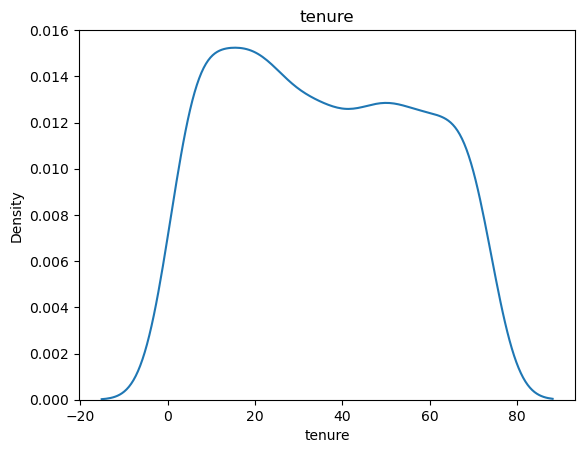

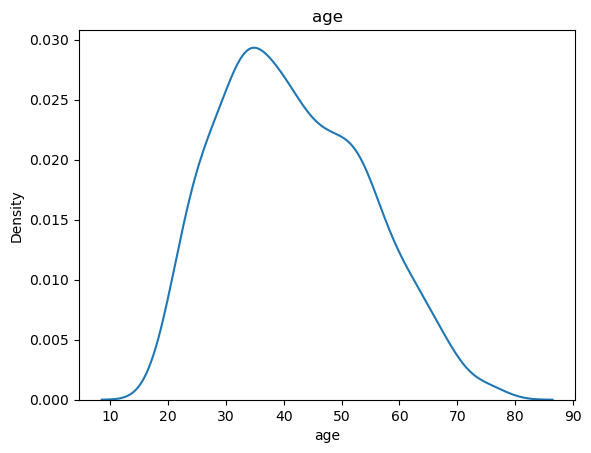

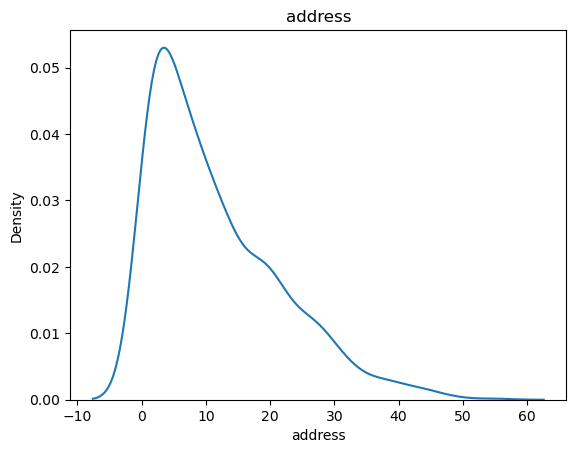

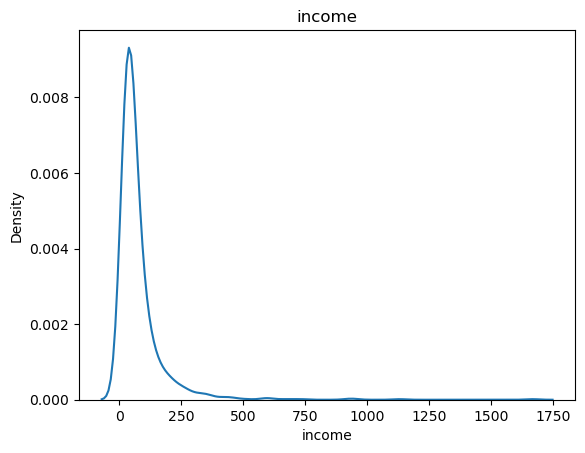

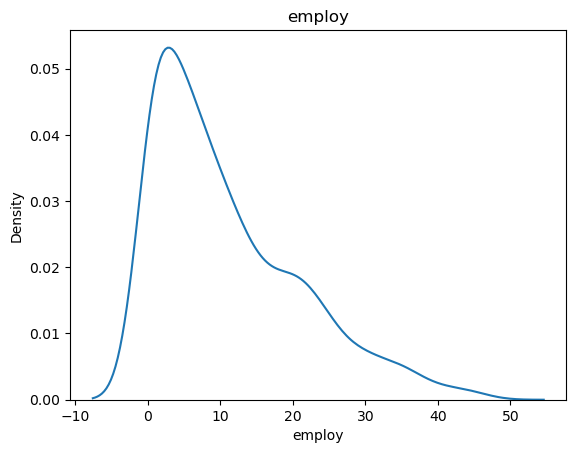

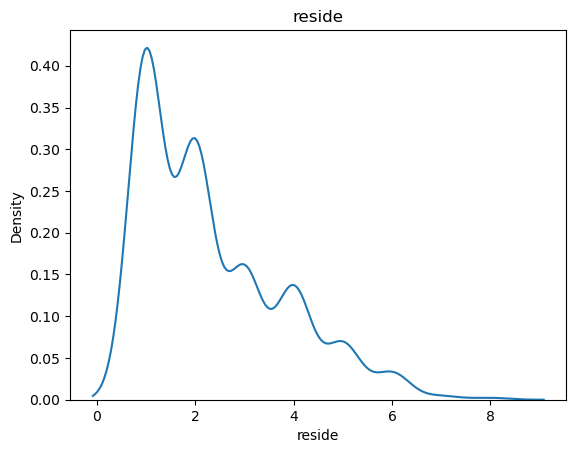

In [12]:
for k in num_features:
  sns.kdeplot(x=k,data = df)
  plt.title(k)
  plt.show()

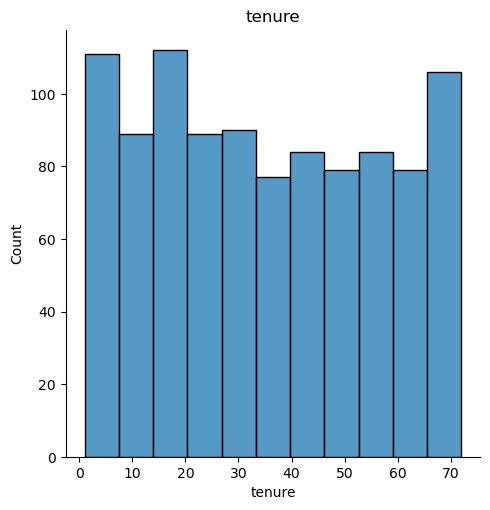

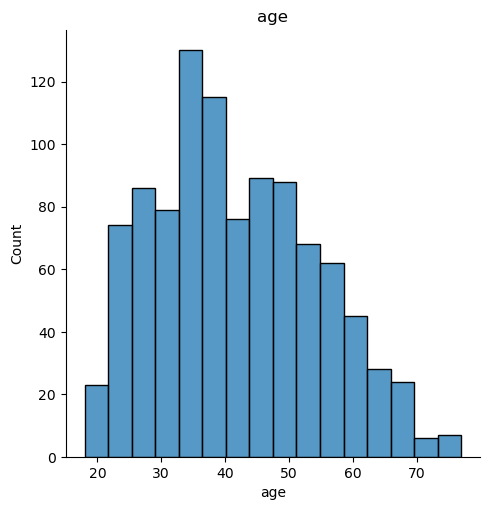

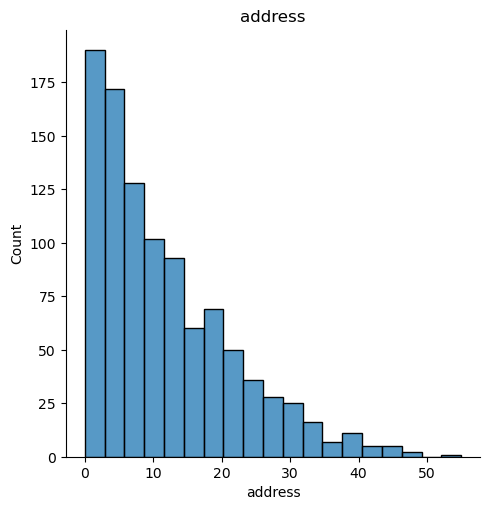

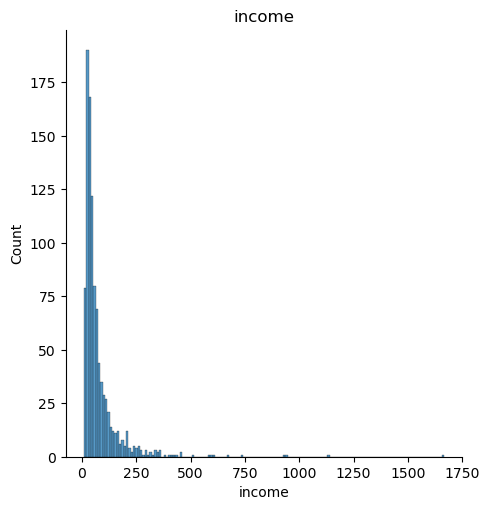

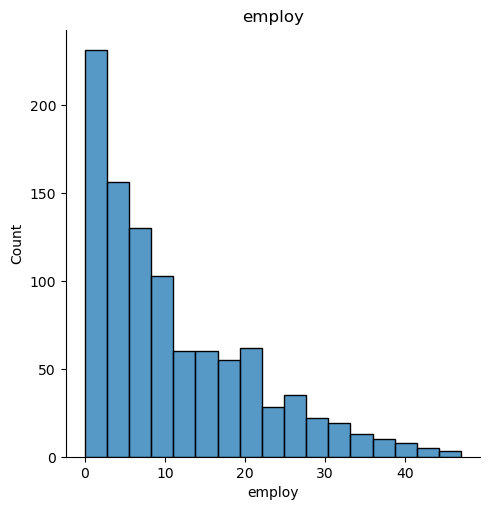

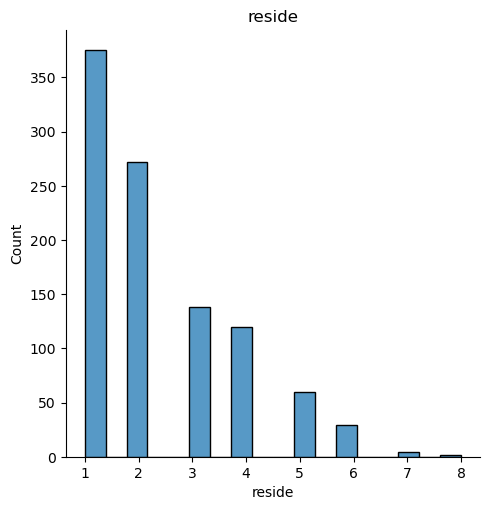

In [13]:
for k in num_features:
  sns.displot(x=k,data = df)
  plt.title(k)
  plt.show()

In [14]:
cat_features =[]
for a in df.columns:
  if df[a].dtypes == 'object':
    cat_features.append(a)
cat_features

['region',
 'marital',
 'ed',
 'retire',
 'gender',
 'tollfree',
 'voice',
 'internet',
 'ebill',
 'custcat',
 'churn']

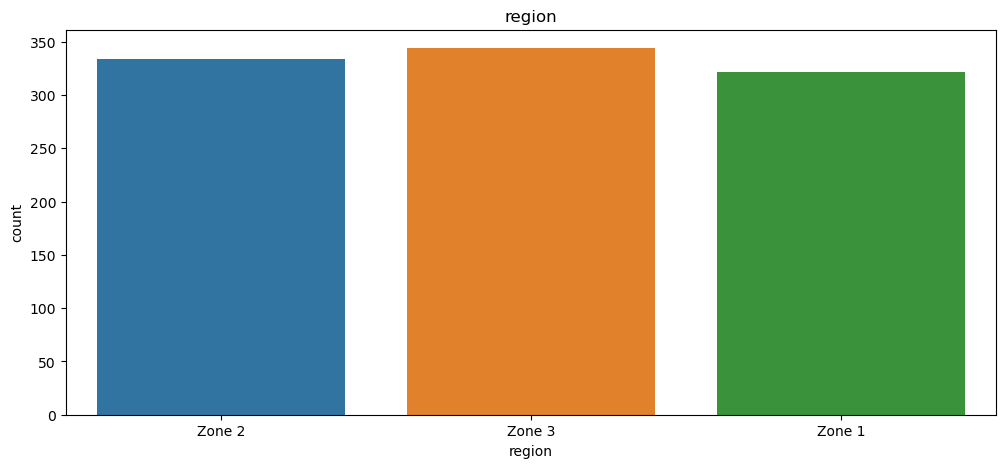

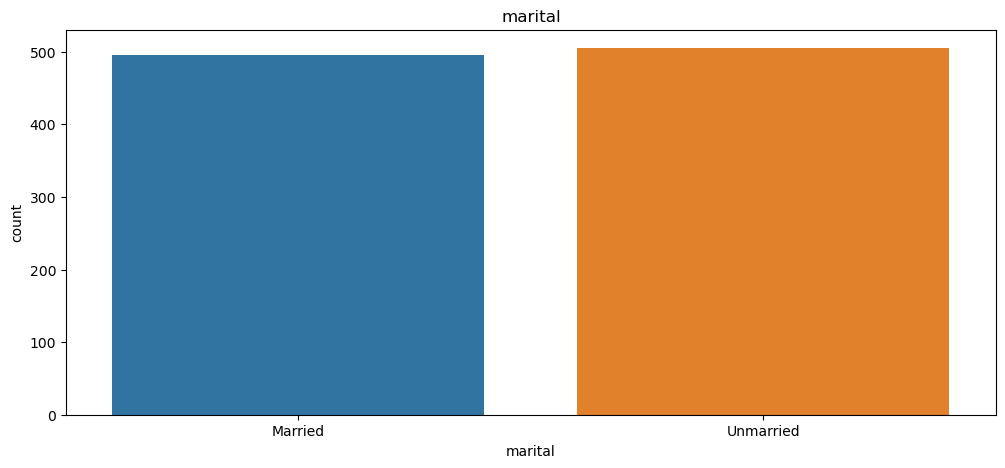

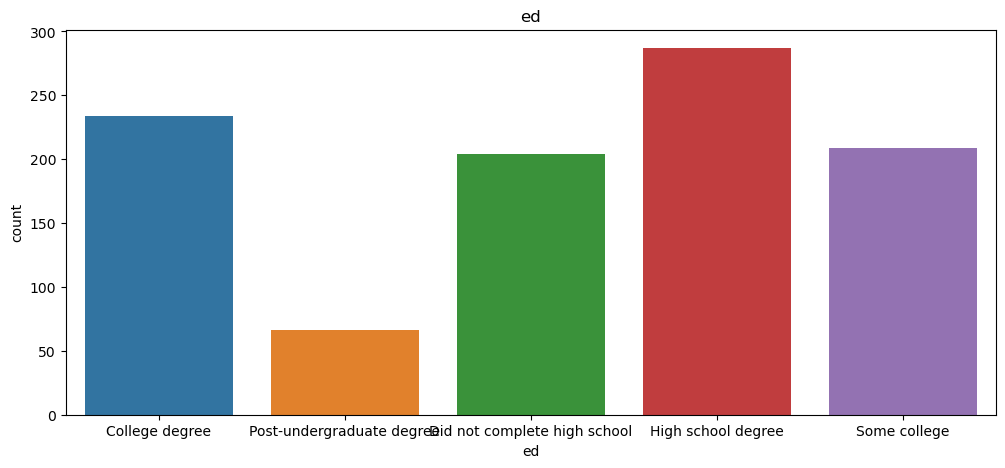

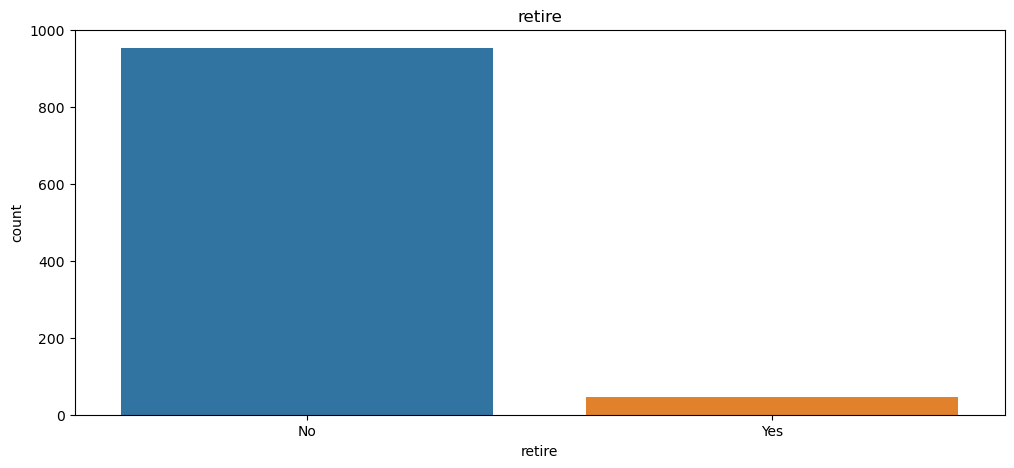

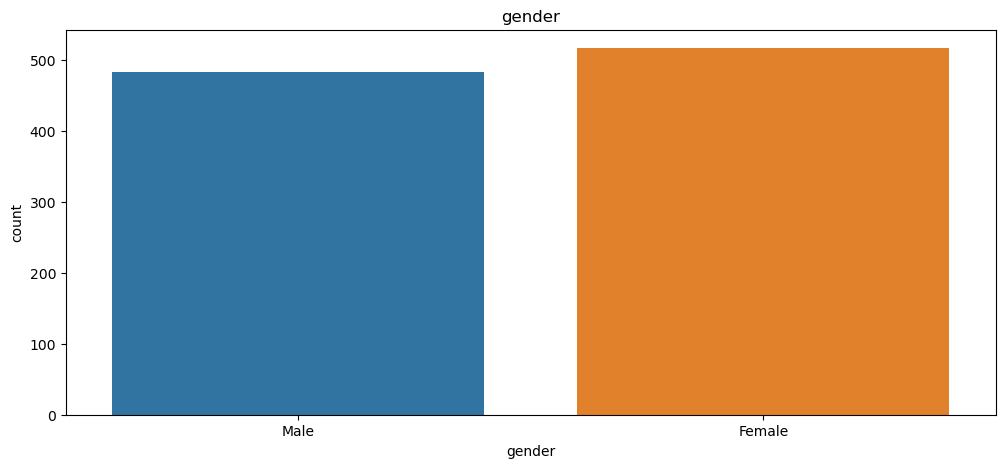

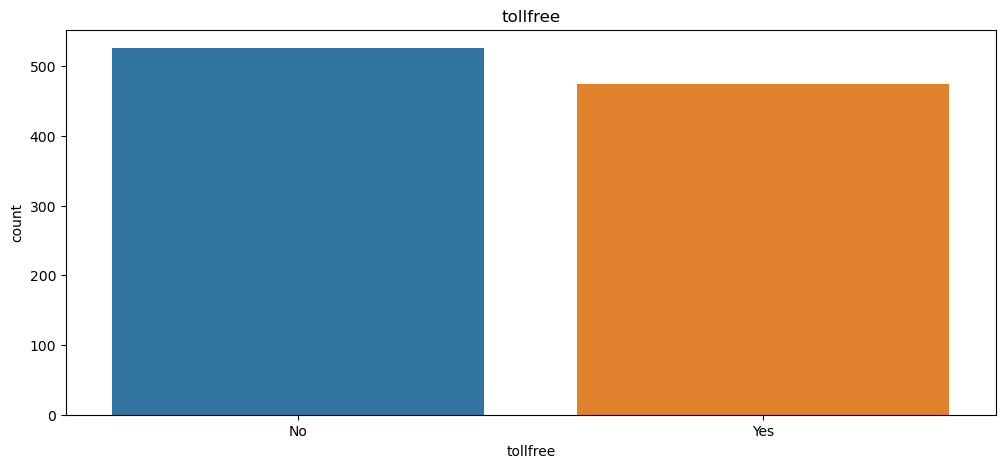

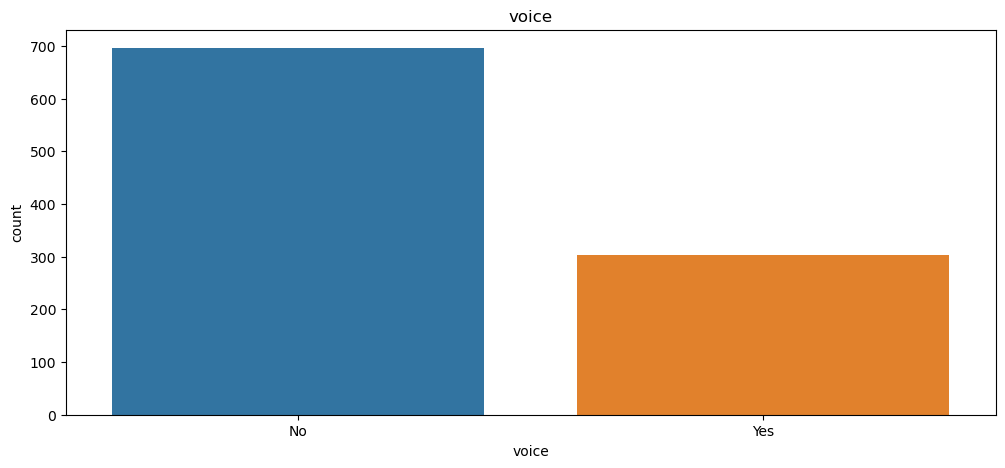

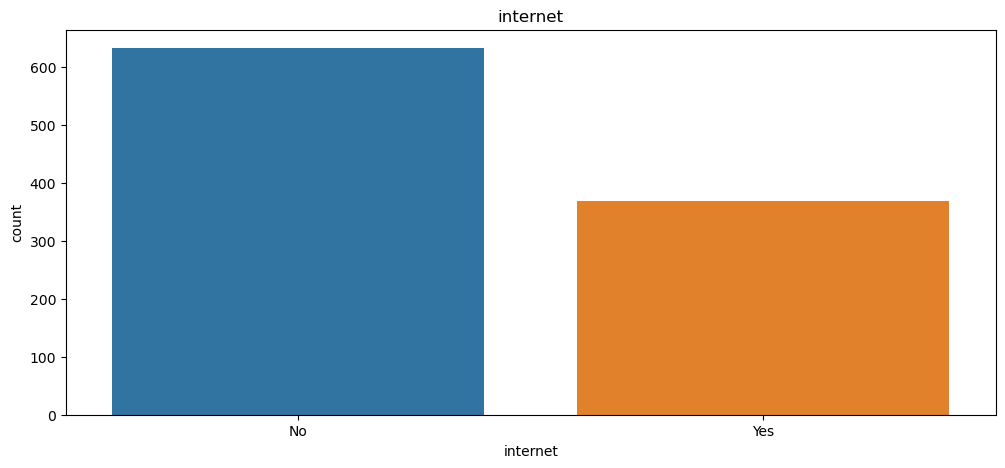

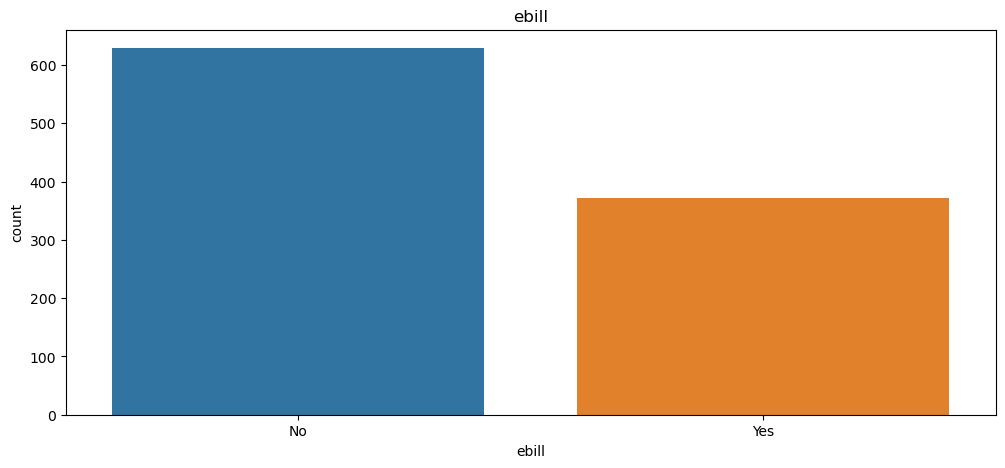

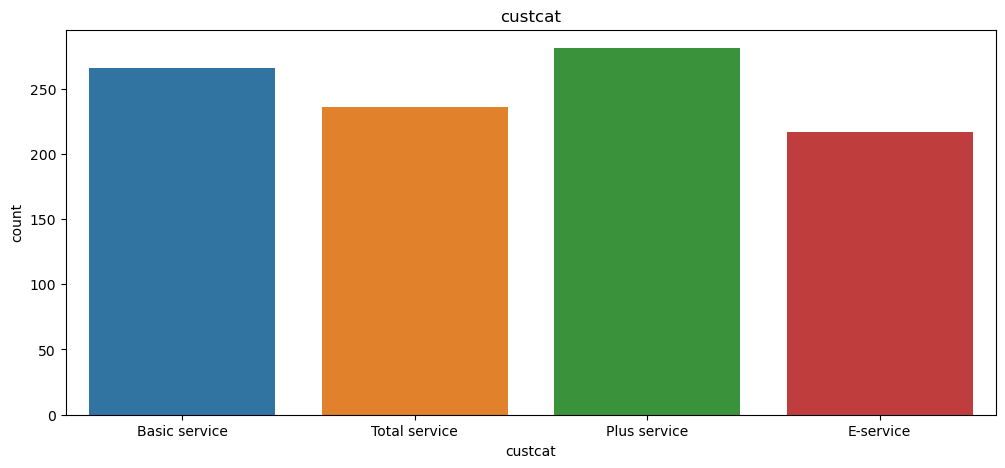

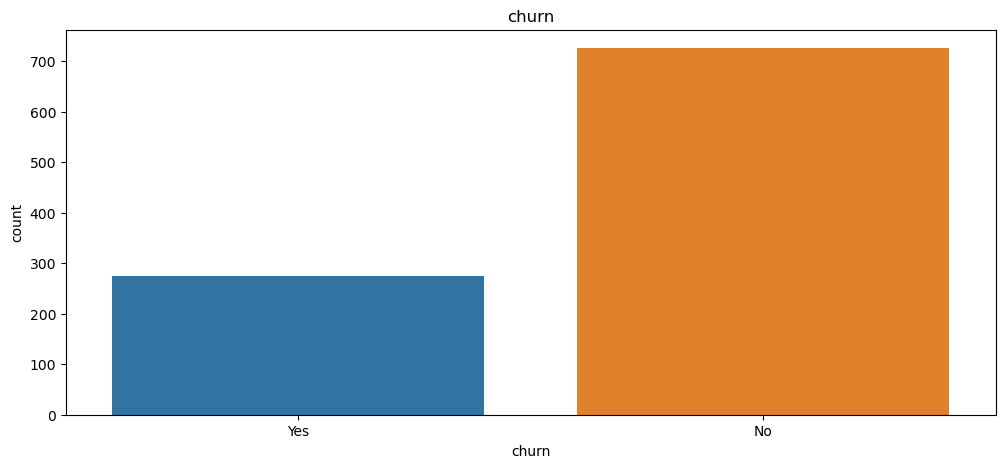

In [15]:
for b in cat_features:
  plt.figure(figsize = (12,5))
  sns.countplot(data = df, x= b)
  plt.title(b)
  plt.show()

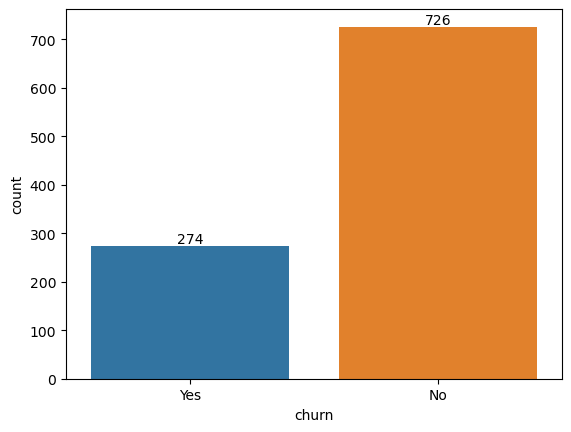

In [16]:
ax = sns.countplot(data=df, x='churn')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

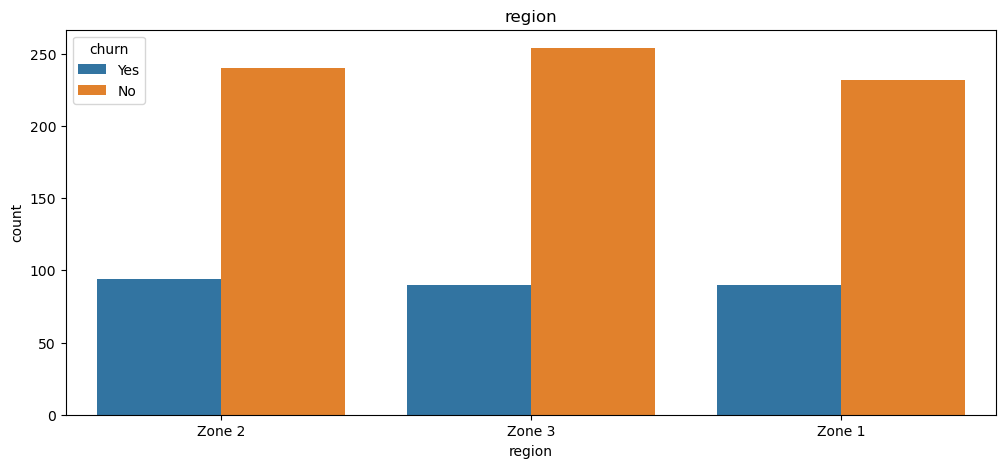

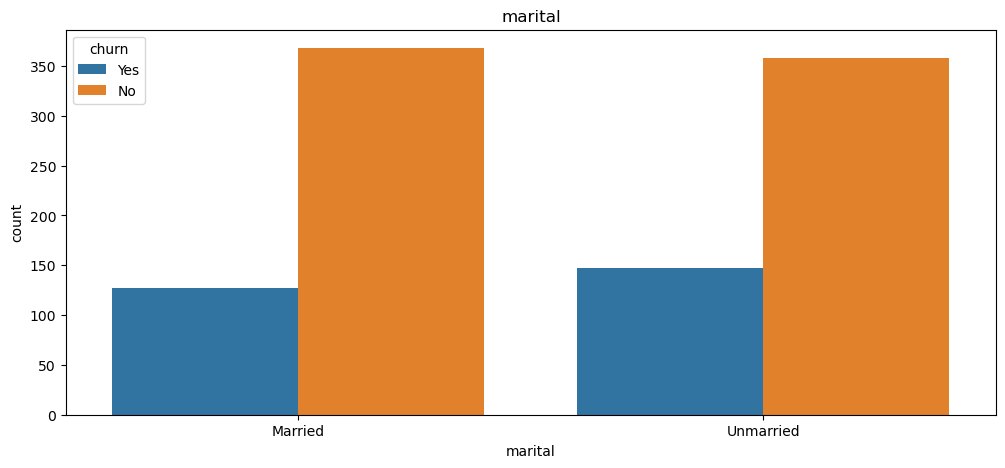

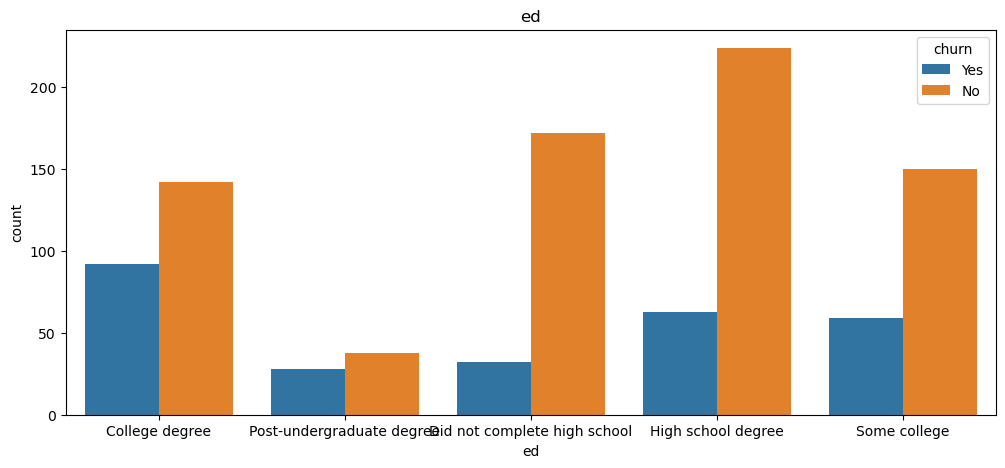

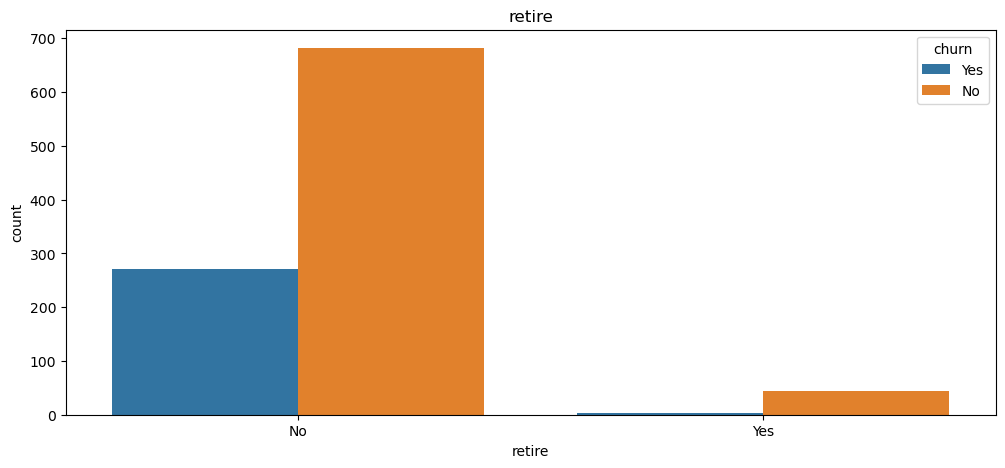

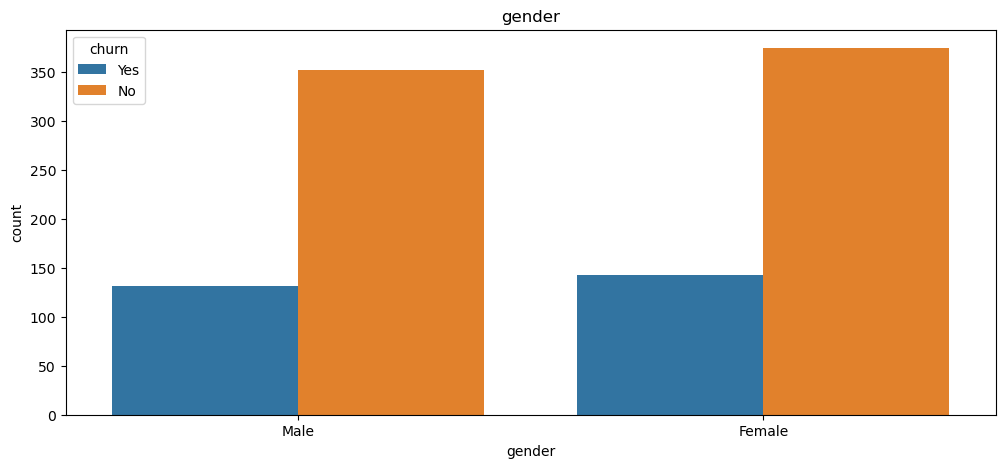

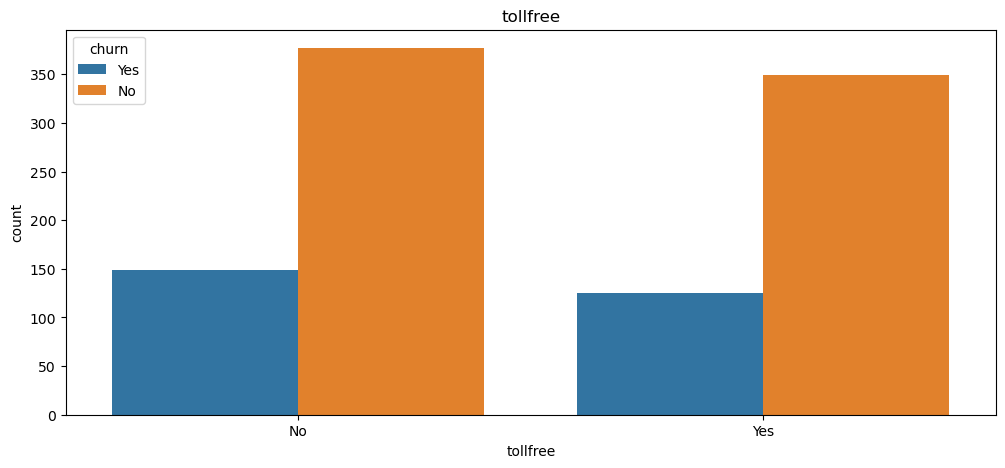

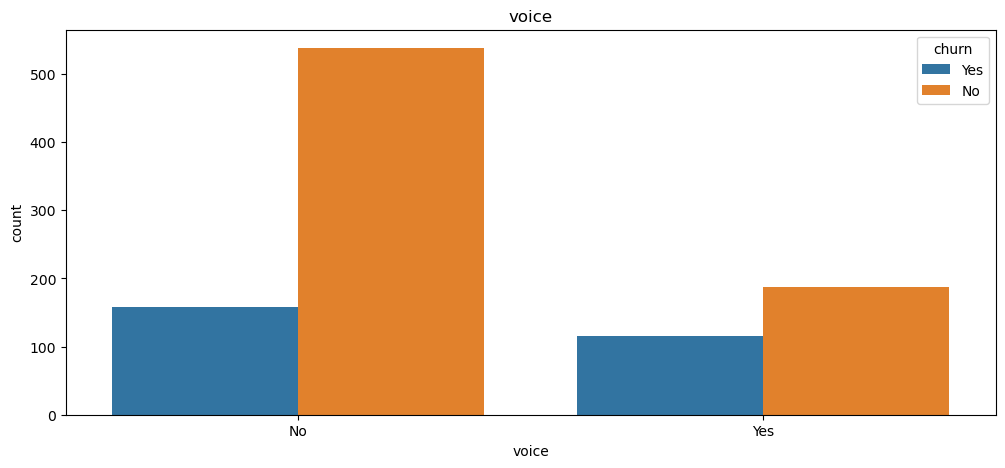

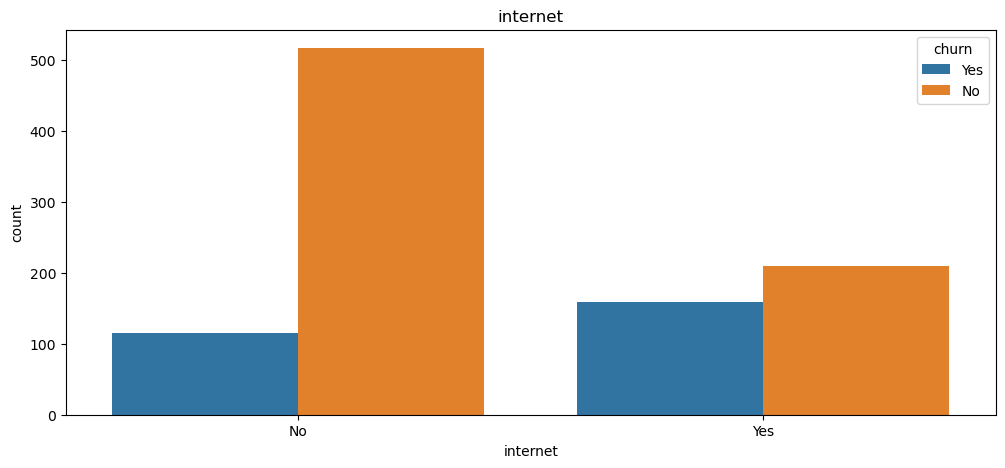

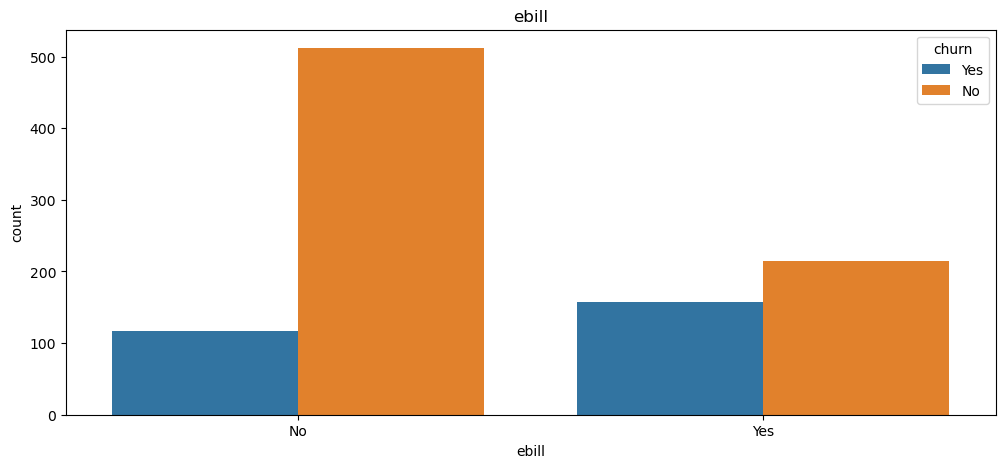

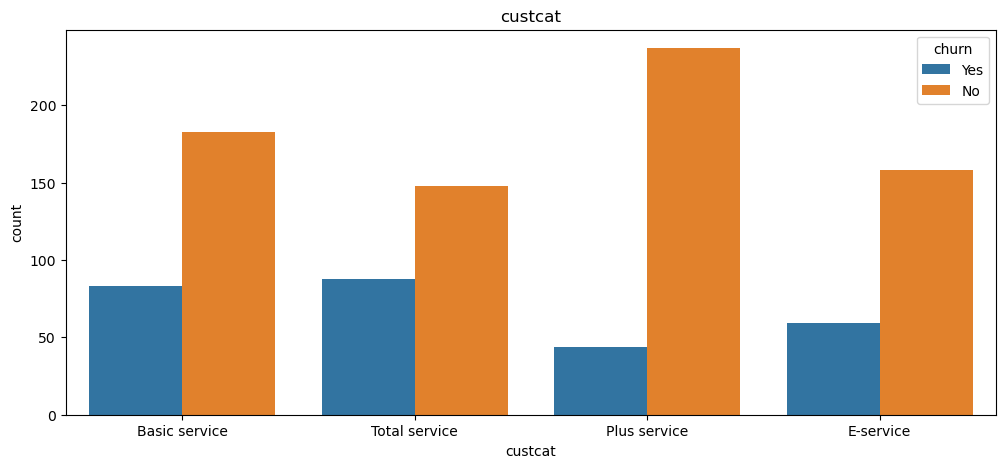

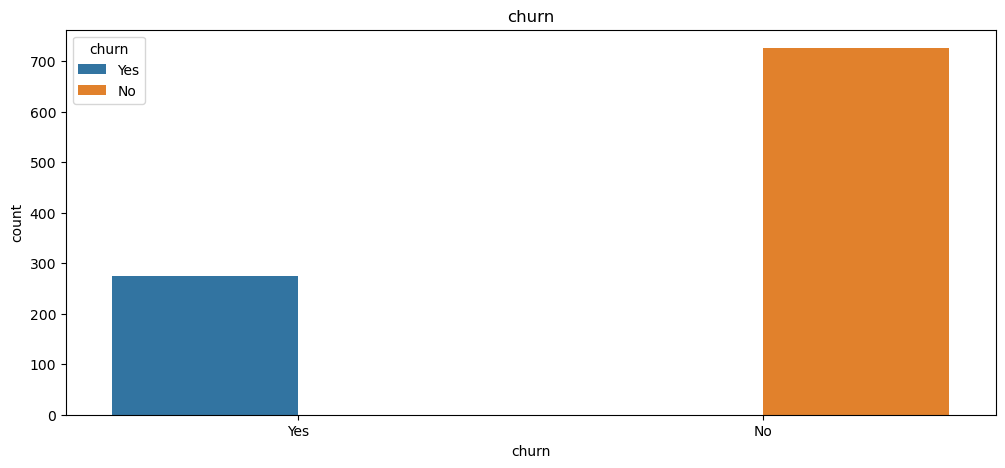

In [17]:
for b in cat_features:
  plt.figure(figsize = (12,5))
  sns.countplot(data = df, x= b,hue= 'churn')
  plt.title(b)
  plt.show()

In [18]:
df.groupby(['gender','churn']).size()

gender  churn
Female  No       374
        Yes      143
Male    No       352
        Yes      131
dtype: int64

# Feature engineering

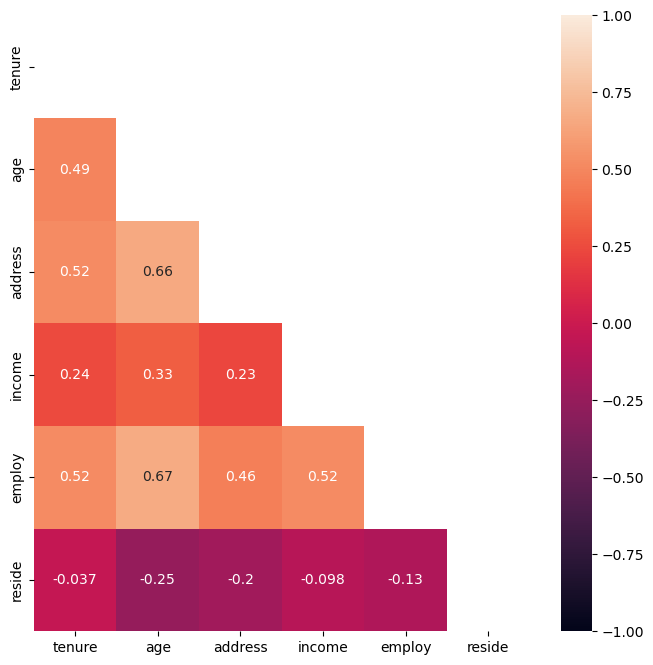

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot = True,vmin = -1,vmax = 1,mask=np.triu(df.corr()))
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,voice,internet,ebill,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,2,No,No,No,No,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,6,Yes,Yes,No,No,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,2,Yes,No,No,No,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,1,No,No,No,No,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,Plus service,No


In [22]:
df['marital'] = df['marital'].map({'Married':1,'Unmarried':0})

In [23]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,voice,internet,ebill,custcat,churn
0,Zone 2,13,44,1,9,64,College degree,5,No,Male,2,No,No,No,No,Basic service,Yes
1,Zone 3,11,33,1,7,136,Post-undergraduate degree,5,No,Male,6,Yes,Yes,No,No,Total service,Yes
2,Zone 3,68,52,1,24,116,Did not complete high school,29,No,Female,2,Yes,No,No,No,Plus service,No
3,Zone 2,33,33,0,12,33,High school degree,0,No,Female,1,No,No,No,No,Basic service,Yes
4,Zone 2,23,30,1,9,30,Did not complete high school,2,No,Male,4,No,No,No,No,Plus service,No


In [24]:
for l in cat_features:
  df[l] =le.fit_transform(df[l])

In [25]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,voice,internet,ebill,custcat,churn
0,1,13,44,1,9,64,0,5,0,1,2,0,0,0,0,0,1
1,2,11,33,1,7,136,3,5,0,1,6,1,1,0,0,3,1
2,2,68,52,1,24,116,1,29,0,0,2,1,0,0,0,2,0
3,1,33,33,0,12,33,2,0,0,0,1,0,0,0,0,0,1
4,1,23,30,1,9,30,1,2,0,1,4,0,0,0,0,2,0


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'voice', 'internet',
       'ebill', 'custcat', 'churn'],
      dtype='object')

In [28]:
variables = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'voice', 'internet',
       'ebill', 'custcat']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,2.470346,region
1,6.442460,tenure
2,15.783790,age
3,3.455034,marital
4,4.367154,address
5,2.356477,income
6,2.463901,ed
7,5.192307,employ
8,1.369236,retire
9,1.929578,gender


** Feature selection **

In [29]:
X = df.drop(['churn'],axis = 1)
y = df['churn']

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

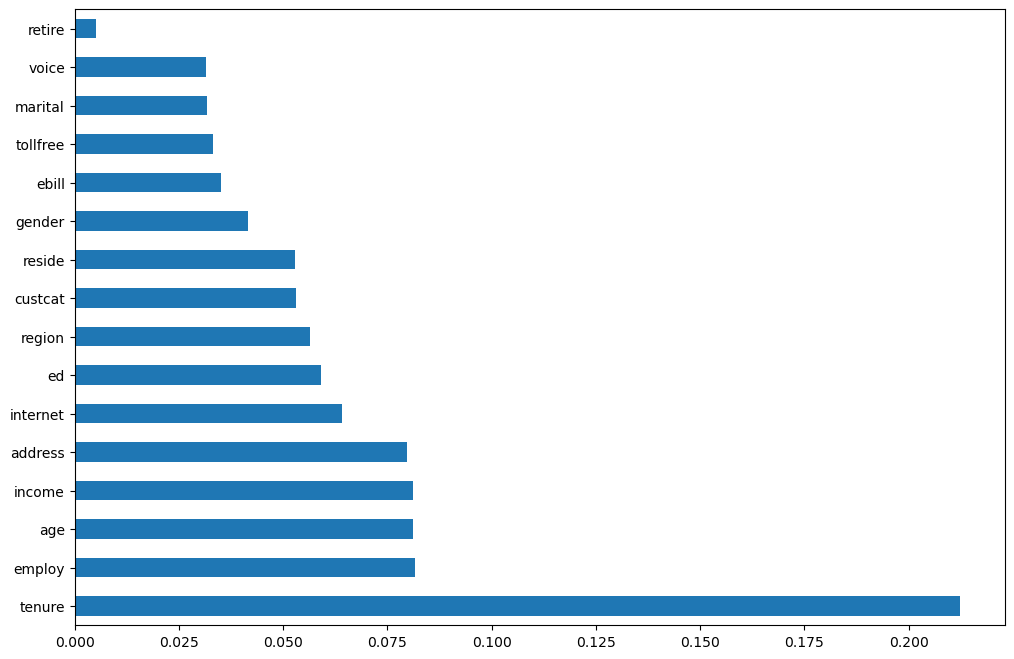

In [31]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Building

In [32]:
# Split data into our test and training datasets
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [33]:
X_train.shape

(700, 16)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)


# Predicting Train and Test data
logreg_prediction = logreg_clf.predict(X_test)
logreg_train_pred = logreg_clf.predict(X_train)

#Model Evaulation

In [36]:
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(logreg_train_pred, Y_train)))
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

# Display the Confusion Matrix and Classification Report
print(confusion_matrix(logreg_prediction, Y_test))
print(classification_report(logreg_prediction, Y_test))

 Train Accuracy 77.14%
 Test Accuracy 79.00%
[[204  49]
 [ 14  33]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       253
           1       0.40      0.70      0.51        47

    accuracy                           0.79       300
   macro avg       0.67      0.75      0.69       300
weighted avg       0.85      0.79      0.81       300



In [37]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.1, 1, 10],                   # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear'],    # Solver algorithms
    'max_iter': [100, 200, 300],         # Maximum number of iterations
    'penalty': ['l1', 'l2'],             # Regularization type
}

In [38]:
# Create GridSearchCV instance with logistic regression model and hyperparameter grid
log_grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance on the data
log_grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [39]:
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", log_grid_search.best_params_)
print("Best Accuracy:", log_grid_search.best_score_)

Best Hyperparameters: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy: 0.7557142857142857


In [40]:
# Predicting Train and Test data
grid_search_prediction = log_grid_search.predict(X_test)
grid_search_train_pred = log_grid_search.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report
print(confusion_matrix(grid_search_prediction, Y_test))
print(classification_report(grid_search_prediction, Y_test))

Train Accuracy 76.86%
Test Accuracy 79.67%
[[206  49]
 [ 12  33]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       255
           1       0.40      0.73      0.52        45

    accuracy                           0.80       300
   macro avg       0.67      0.77      0.70       300
weighted avg       0.86      0.80      0.82       300



#Random Forest

In [41]:
# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)


# Predicting Train and Test data
ranfor_prediction = ranfor_clf.predict(X_test)
ranfor_train_pred = ranfor_clf.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report
print(confusion_matrix(ranfor_prediction, Y_test))
print(classification_report(ranfor_prediction, Y_test))

Train Accuracy 100.00%
Test Accuracy 77.67%
[[203  52]
 [ 15  30]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       255
           1       0.37      0.67      0.47        45

    accuracy                           0.78       300
   macro avg       0.65      0.73      0.67       300
weighted avg       0.85      0.78      0.80       300



#Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dTree_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_model1.fit(X_train, Y_train)
print(dTree_model1.score(X_train, Y_train)) # accuracy
print(dTree_model1.score(X_test, Y_test))

1.0
0.6866666666666666


#XGB

In [43]:
# fit model no training data
XGB_model = XGBClassifier(n_estimators=1000,max_depth=3, max_leaves=10, learning_rate=0.001)
XGB_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_train_pred = XGB_model.predict(X_train)
y_pred = XGB_model.predict(X_test)
accuracy = accuracy_score(Y_train, y_train_pred)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 76.43%
Test Accuracy: 76.00%


In [45]:
print(confusion_matrix(Y_train, y_train_pred))
print(classification_report(Y_test, y_pred))

[[495  13]
 [152  40]]
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       218
           1       0.75      0.18      0.29        82

    accuracy                           0.76       300
   macro avg       0.76      0.58      0.57       300
weighted avg       0.76      0.76      0.70       300



In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to search
param_grid = {
 'max_depth':[4,5],
    'min_child_weight':[5,6],
    'gamma':[0,1,4],
    'subsample':[0,1],
 'colsample_bytree':[0,1]
}

In [47]:
# Create GridSearchCV instance with logistic regression model and hyperparameter grid
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, scoring='accuracy',error_score='raise')
# Fit the GridSearchCV instance on the data
grid_search.fit(X_train,Y_train)

GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=10, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,


In [48]:
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 1, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 1}
Best Accuracy: 0.7428571428571429


In [49]:
# Predicting Train and Test data
grid_search_prediction = grid_search.predict(X_test)
grid_search_train_pred = grid_search.predict(X_train)

print("Train Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_train_pred, Y_train)))
print("Test Accuracy {0:.2f}%".format(100*accuracy_score(grid_search_prediction, Y_test)))


# Display the Confusion Matrix and Classification Report
print(confusion_matrix(grid_search_prediction, Y_test))
print(classification_report(grid_search_prediction, Y_test))

Train Accuracy 76.29%
Test Accuracy 76.33%
[[213  66]
 [  5  16]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       279
           1       0.20      0.76      0.31        21

    accuracy                           0.76       300
   macro avg       0.59      0.76      0.58       300
weighted avg       0.92      0.76      0.82       300



#Light GBM

In [51]:
#!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 10.4 MB/s eta 0:00:00


In [52]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=Y_train)

In [54]:
params = {}
params['learning_rate'] = 0.002#,0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [55]:
params

{'learning_rate': 0.002,
 'boosting_type': 'gbdt',
 'objective': 'binary',
 'metric': 'binary_logloss',
 'sub_feature': 0.5,
 'num_leaves': 10,
 'min_data': 50,
 'max_depth': 10}

In [56]:
clf = lgb.train(params, d_train, 1400)

[LightGBM] [Info] Number of positive: 192, number of negative: 508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.274286 -> initscore=-0.972986
[LightGBM] [Info] Start training from score -0.972986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [57]:
#Prediction
y_pred=clf.predict(X_test)
predictions = [round(value) for value in y_pred]

In [58]:
accuracy_score(Y_test, predictions)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[207  11]
 [ 56  26]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       218
           1       0.70      0.32      0.44        82

    accuracy                           0.78       300
   macro avg       0.74      0.63      0.65       300
weighted avg       0.76      0.78      0.74       300



In [59]:
import pickle
# open a file, where you ant to store the data
file = open('Telco churn_XGB.pkl', 'wb') #opened for writing binary code.
# dump information to that file
pickle.dump(grid_search, file)
file.close()

In [60]:
# opening the pickle file
model = open('Telco churn_XGB.pkl','rb')
forest = pickle.load(model)
prediction = forest.predict(X_test)

In [61]:
print(confusion_matrix(prediction, Y_test))
print(classification_report(prediction, Y_test))

[[213  66]
 [  5  16]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       279
           1       0.20      0.76      0.31        21

    accuracy                           0.76       300
   macro avg       0.59      0.76      0.58       300
weighted avg       0.92      0.76      0.82       300



In [62]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'voice', 'internet',
       'ebill', 'custcat', 'churn'],
      dtype='object')

#Deployment Code

In [63]:
%%writefile app.py
# Import necessary libraries
import pickle
import streamlit as st

# Load the trained model
pickle_in = open('Telco churn_XGB.pkl', 'rb')
classifier = pickle.load(pickle_in)

# Define the prediction function
def prediction(region,tenure,age,marital,address,income,ed,
       employ,retire,gender,reside,tollfree,voice,internet,
       ebill,custcat):

    # Making prediction
    prediction = classifier.predict([[region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,tollfree,voice,internet,
       ebill,custcat]])

    if prediction == 0:
        pred = 'will not churn'
    else:
        pred = 'is likely to churn'
    return pred

# Main function for the Streamlit app
def main():
    # Front-end elements of the web page
    st.title("Churn Prediction of customers")

    # User input fields
    region = st.number_input('region')
    tenure = st.number_input('tenure')
    age = st.number_input('age')
    marital = st.number_input('marital')
    address = st.number_input('address')
    income = st.number_input('income')
    ed = st.number_input('Education')
    employ = st.number_input('employ')
    retire = st.number_input('retire')
    gender = st.number_input('Gender')
    reside = st.number_input('reside')
    tollfree = st.number_input('Toll free')
    voice = st.number_input('voice calls')
    internet = st.number_input('internet')
    ebill = st.number_input('ebill')
    custcat = st.number_input('custcat')
    result = ""

    # When predict button is clicked
    if st.button('Predict'):
        result = prediction(region,tenure,age,marital,address,income,ed,
       employ,retire,gender,reside,tollfree,voice,internet,
       ebill,custcat)
        st.success('Customer {}'.format(result))

if __name__ == '__main__':
    main()

Overwriting app.py


#!pip install streamlit

In [1]:
!streamlit run app.py

^C
